In [1]:
library(tesseract)
library(magick)

Linking to ImageMagick 6.9.9.14
Enabled features: cairo, freetype, fftw, ghostscript, lcms, pango, rsvg, webp
Disabled features: fontconfig, x11


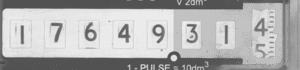

  format width height colorspace matte filesize density
1    PNG   300     70       Gray FALSE        0   28x28


In [2]:
input <- image_read("https://raw.githubusercontent.com/LorenzoNegri/OCR-Experiments/master/Data/gas_meter.png") %>%
        image_convert(type = 'Grayscale') %>% 
        image_modulate(brightness = 80, saturation = 0, hue = 0) %>%
        image_negate() %>%
        # cropping the image to only numbers
        image_crop("300x70+35+130")
print(input) 

In [3]:
text <- tesseract::ocr(input)
cat(text)

| 764 9130]


The result is not what we want, so let's try with an engine edit:

In [4]:
# tessedit_char_whitelist restricts the output to a limited set of characters
numbers <- tesseract(options = list(tessedit_char_whitelist = "0123456789"))
cat(ocr(input, engine = numbers))

17649130


Better than before, but not perfect.